In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data.csv')
df.head()

,BPM
0,530
1,518
2,506
3,494
4,483


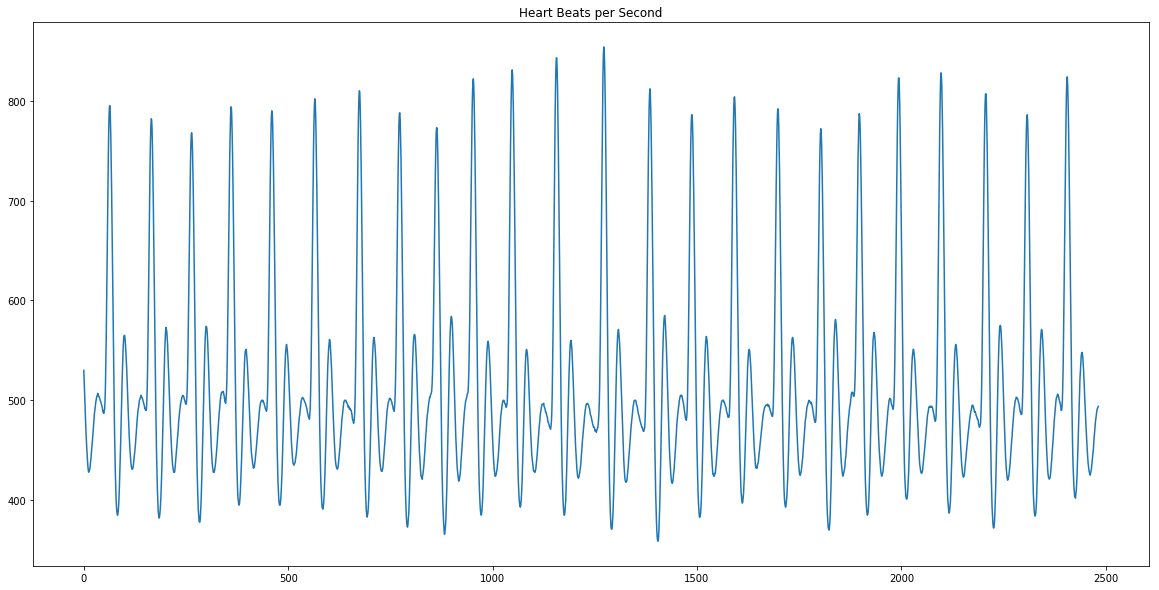

In [3]:
plt.figure(figsize=(20,10))
plt.title('Heart Beats per Second')
plt.plot(df.BPM)

In [4]:
#Calculate moving average with 0.75s in both directions, then append do dataset
hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
fs = 100 #The example dataset was recorded at 100Hz
mov_avg = df['BPM'].rolling(int(hrw*fs)).mean() #Calculate moving average

In [5]:
#Impute where moving average function returns NaN, which is the beginning of the signal where x hrw
avg_hr = (np.mean(df.BPM))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
mov_avg = [x*1.2 for x in mov_avg] #For now we raise the average by 20% to prevent the secondary heart contraction from interfering, in part 2 we will do this dynamically
df['bpm_rollingmean'] = mov_avg #Append the moving average to the dataframe

In [6]:
#Mark regions of interest
window = []
peaklist = []
listpos = 0 #We use a counter to move over the different data columns
for datapoint in df.BPM:
    rollingmean = df.bpm_rollingmean[listpos] #Get local mean
    if (datapoint < rollingmean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
        listpos += 1
    elif (datapoint > rollingmean): #If signal comes above local mean, mark ROI
        window.append(datapoint)
        listpos += 1
    else: #If signal drops below local mean -> determine highest point
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #Notate the position of the point on the X-axis
        peaklist.append(beatposition) #Add detected peak to list
        window = [] #Clear marked ROI
        listpos += 1

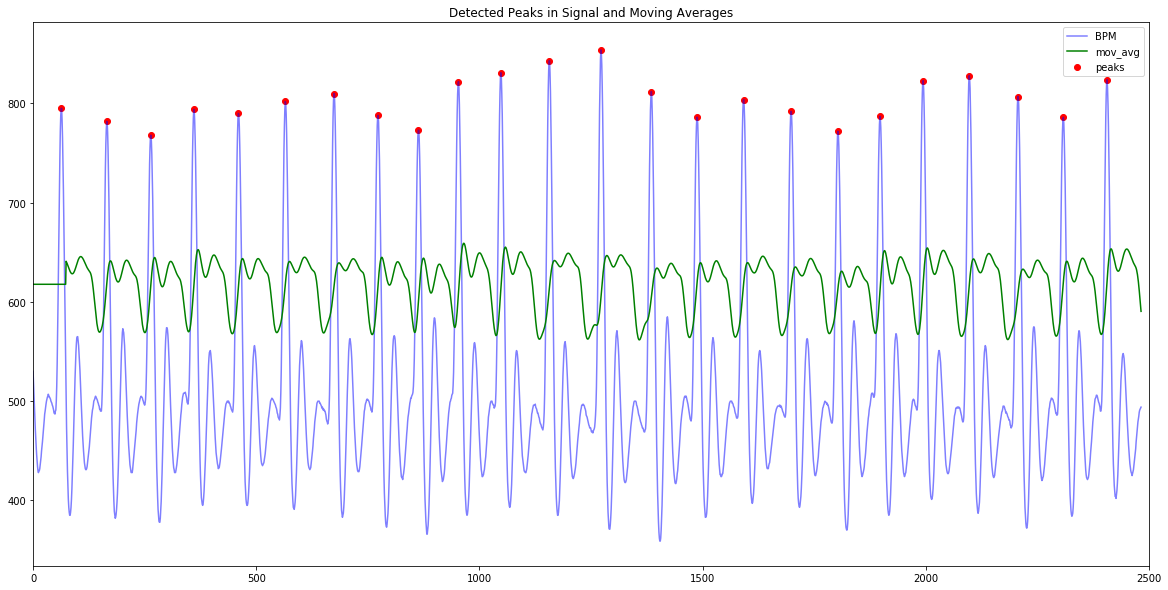

In [7]:
ybeat = [df.BPM[x] for x in peaklist] #Get the y-value of all peaks for plotting purposes
plt.figure(figsize=(20,10))
plt.title("Detected Peaks in Signal and Moving Averages")
plt.xlim(0,2500)
plt.plot(df.BPM, alpha=0.5, color='blue', label='BPM') #Plot semi-transparent HR
plt.plot(mov_avg, color ='green', label='mov_avg') #Plot moving average
plt.scatter(peaklist, ybeat, color='red', label='peaks') #Plot detected peaks
plt.legend(loc='best')
plt.show()